# **CS575**
# **IBM_stock**
# **Manohar Kumar**


In [ ]:

from pandas_datareader import data as pdr
from datetime import datetime
#import packages
import pandas as pd
import numpy as np
#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline
#setting figure size
from matplotlib.pylab import rcParams
#rcParams['figure.figsize'] = 15,7




In [ ]:
#download data
ibm = pdr.DataReader('IBM', 'yahoo', start=datetime(2014, 8, 1), end=datetime(2016, 11, 30)) 
#print first few lines of data
print(ibm.head())
#export and save as csv files
ibm.to_csv('IBM_stock.csv', sep=',')


                  High         Low  ...     Volume   Adj Close
Date                                ...                       
2014-08-01  191.500000  188.860001  ...  5181100.0  143.561371
2014-08-04  189.949997  188.600006  ...  2125900.0  143.933304
2014-08-05  189.199997  186.440002  ...  3307900.0  142.005493
2014-08-06  186.880005  184.440002  ...  3847000.0  141.982544
2014-08-07  186.679993  183.580002  ...  2708600.0  140.707535

[5 rows x 6 columns]


In [ ]:

#normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
ibm.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-08-01,191.500000,188.860001,190.500000,189.149994,5181100.0,143.561371
2014-08-04,189.949997,188.600006,189.350006,189.639999,2125900.0,143.933304
2014-08-05,189.199997,186.440002,188.750000,187.100006,3307900.0,142.005493
2014-08-06,186.880005,184.440002,185.360001,185.970001,3847000.0,141.982544
2014-08-07,186.679993,183.580002,186.639999,184.300003,2708600.0,140.707535


In [ ]:
ibm.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 589 entries, 2014-08-01 to 2016-11-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       589 non-null    float64
 1   Low        589 non-null    float64
 2   Open       589 non-null    float64
 3   Close      589 non-null    float64
 4   Volume     589 non-null    float64
 5   Adj Close  589 non-null    float64
dtypes: float64(6)
memory usage: 32.2 KB


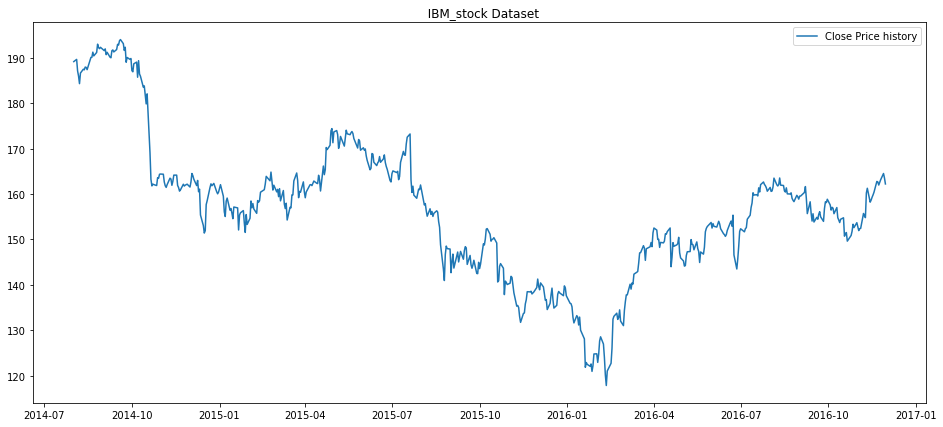

In [ ]:
plt.figure(figsize=(16,7))
plt.plot(ibm["Close"], label='Close Price history')
plt.title('  IBM_stock Dataset')
plt.legend()
plt.show()

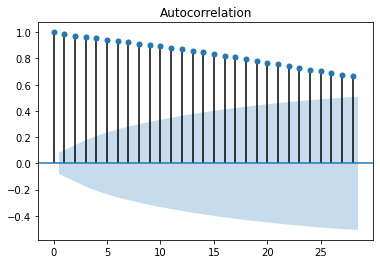

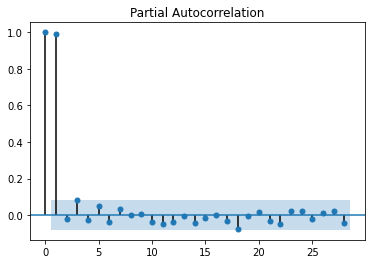

In [ ]:

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(ibm['Close'])
plt.show()

from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(ibm['Close'])
plt.show()

# **Test for stationarit**y

In [ ]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
def kpss_test(atr):
    timeseries = ibm[atr].dropna()
    print ('Results of KPSS Test for ',atr)
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
kpss_test('Close')

Results of KPSS Test for  Close
Test Statistic            1.268862
p-value                   0.010000
Lags Used                19.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1907: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


## **P value is less than .05 so, it is non stationary**

In [ ]:

#define function for ADF test
from statsmodels.tsa.stattools import adfuller

def adf_test(atr):
    #Perform Dickey-Fuller test:
    timeseries = ibm[atr].dropna()
    print ('Results of Dickey-Fuller Test for ',atr,'\n')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
#apply adf test on the series
adf_test('Close')

Results of Dickey-Fuller Test for  Close 

Test Statistic                  -2.279273
p-value                          0.178740
#Lags Used                       0.000000
Number of Observations Used    588.000000
Critical Value (1%)             -3.441520
Critical Value (5%)             -2.866468
Critical Value (10%)            -2.569394
dtype: float64


**P value is greater than .05 so, it is non stationary**

**KPSS AND ADF test gives non stationary so, given dataset is no stationary**

**Making a Time Series Stationary**

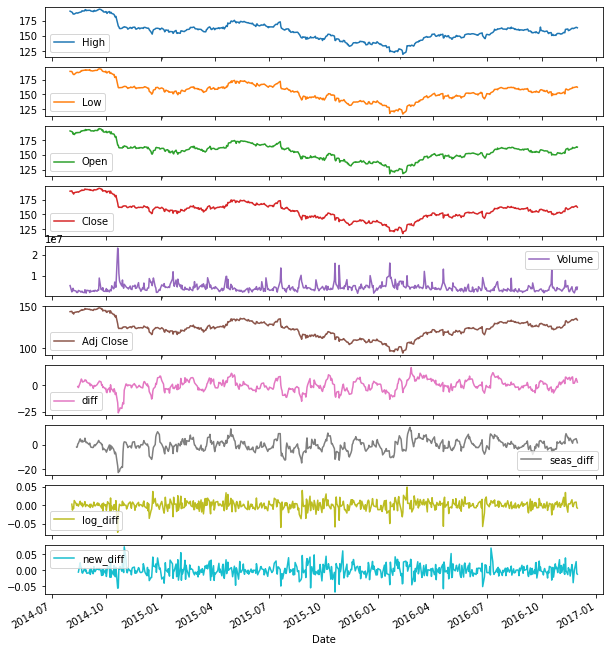

In [ ]:
# Differencing
ibm['diff'] = ibm['Close'].diff(periods=9)

# Seasonal Differencing
ibm['seas_diff'] = ibm['Close'].diff(periods=7)

# Transformation (here we use log transformation)
dataset_log = np.log(ibm['Close'])
ibm['log_diff'] = dataset_log.diff(periods=1)
ibm['new_diff'] = ibm['log_diff'].diff(periods=9)
ibm.plot(subplots=True, figsize=(10,12))
plt.show()

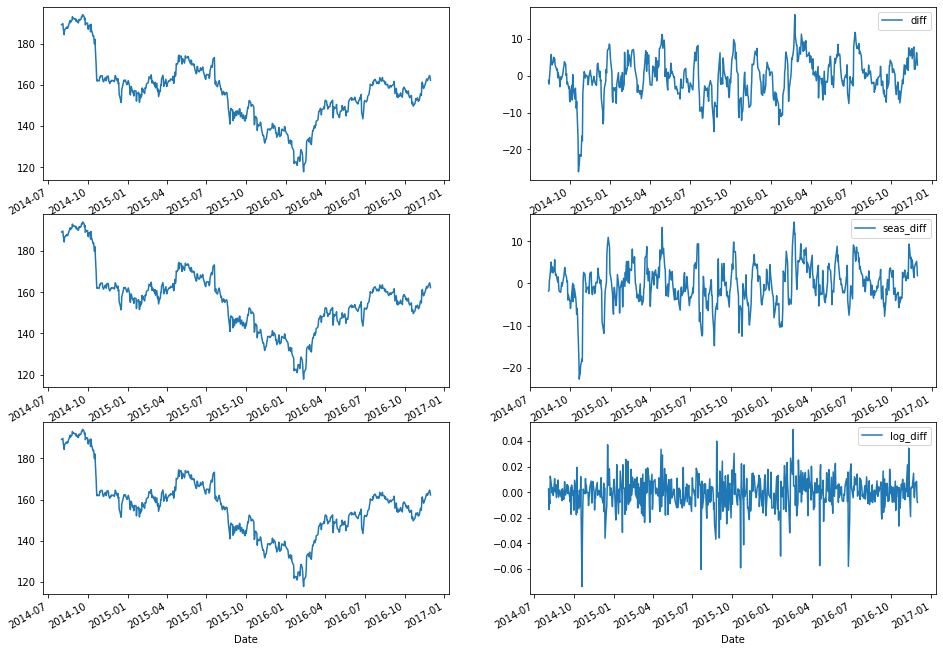

In [ ]:
# visualize
plt.figure(figsize=(16,12))
plt.subplot(3,2,1)
ibm['Close'].plot()
plt.subplot(3,2,2)
ibm['diff'].plot()
plt.legend()

plt.subplot(3,2,3)
ibm['Close'].plot()
plt.subplot(3,2,4)
ibm['seas_diff'].plot()
plt.legend()

plt.subplot(3,2,5)
ibm['Close'].plot()
plt.subplot(3,2,6)
ibm['log_diff'].plot()
plt.legend()
plt.show()

**Test Results**

In [ ]:
adf_test('Close')
print("\n")
kpss_test('Close')

Results of Dickey-Fuller Test for  Close 

Test Statistic                  -2.279273
p-value                          0.178740
#Lags Used                       0.000000
Number of Observations Used    588.000000
Critical Value (1%)             -3.441520
Critical Value (5%)             -2.866468
Critical Value (10%)            -2.569394
dtype: float64


Results of KPSS Test for  Close
Test Statistic            1.268862
p-value                   0.010000
Lags Used                19.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1907: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


In [ ]:
adf_test('diff')
print("\n")
kpss_test('diff')

Results of Dickey-Fuller Test for  diff 

Test Statistic                  -3.940122
p-value                          0.001759
#Lags Used                      19.000000
Number of Observations Used    560.000000
Critical Value (1%)             -3.442081
Critical Value (5%)             -2.866715
Critical Value (10%)            -2.569526
dtype: float64


Results of KPSS Test for  diff
Test Statistic            0.27842
p-value                   0.10000
Lags Used                19.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1911: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


In [ ]:
adf_test('seas_diff')
print("\n")
kpss_test('seas_diff')

Results of Dickey-Fuller Test for  seas_diff 

Test Statistic                  -4.559737
p-value                          0.000153
#Lags Used                      17.000000
Number of Observations Used    564.000000
Critical Value (1%)             -3.441998
Critical Value (5%)             -2.866678
Critical Value (10%)            -2.569506
dtype: float64


Results of KPSS Test for  seas_diff
Test Statistic            0.272581
p-value                   0.100000
Lags Used                19.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1911: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


In [ ]:
adf_test('log_diff')
print("\n")
kpss_test('log_diff')

Results of Dickey-Fuller Test for  log_diff 

Test Statistic                -1.830987e+01
p-value                        2.277281e-30
#Lags Used                     1.000000e+00
Number of Observations Used    5.860000e+02
Critical Value (1%)           -3.441558e+00
Critical Value (5%)           -2.866485e+00
Critical Value (10%)          -2.569403e+00
dtype: float64


Results of KPSS Test for  log_diff
Test Statistic            0.23043
p-value                   0.10000
Lags Used                19.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1911: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


**From the above test all test gives Stationarity so i am considering log_diff**

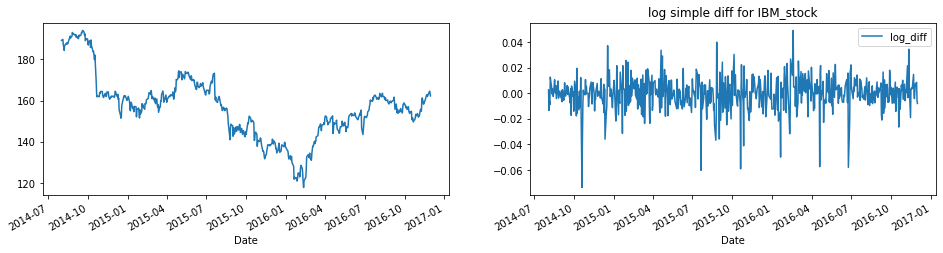

In [ ]:
plt.figure(figsize=(16,12))
plt.subplot(3,2,1)
ibm['Close'].plot()
plt.subplot(3,2,2)
ibm['log_diff'].plot()
plt.title('log simple diff for IBM_stock')
plt.legend()
plt.show()

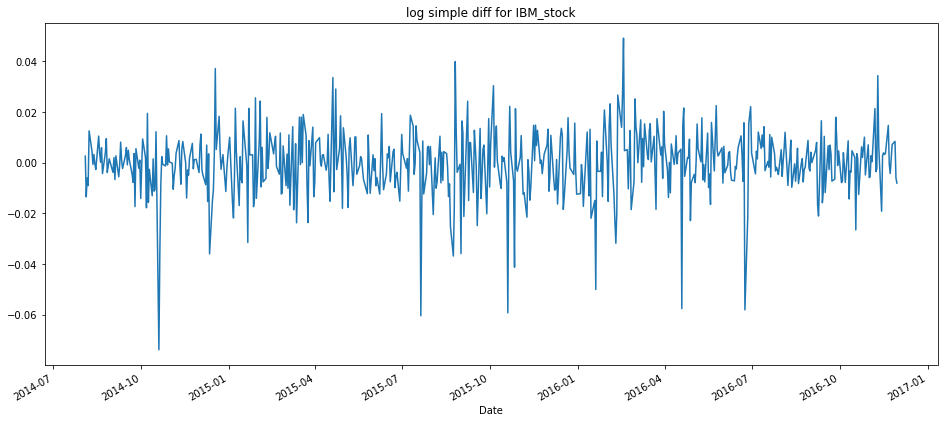

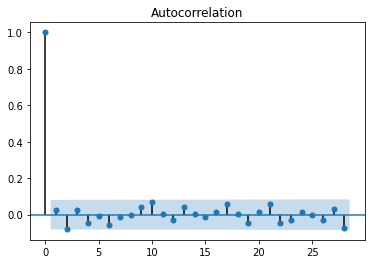

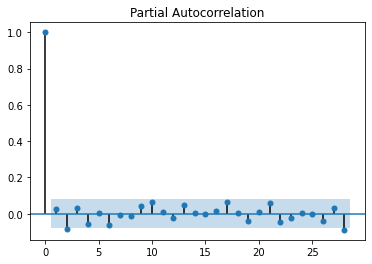

In [ ]:
ibm['log_diff'].plot(figsize=[16,7])
plt.title('log simple diff for IBM_stock')

plot_acf(ibm['log_diff'].dropna())
plt.show()


plot_pacf(ibm['log_diff'].dropna())
plt.show()

# **Creating  different models**

# **classical Models**

# **1) ARIMA**

In [ ]:
 !pip install pmdarima

In [ ]:
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(ibm["Close"], start_p=1, start_q=1,
                           max_p=3, max_q=3, m=1,
                           start_P=0, seasonal=False,
                           d=1, D=0, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2471.231, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2473.595, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2475.556, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2475.548, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2471.911, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2472.974, Time=0.37 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2472.874, Time=0.35 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2473.290, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2473.745, Time=0.15 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2474.239, Time=0.75 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2469.536, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2473.858, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2473.866, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2471.303, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0]          

Root Mean Square Error (RMSE) with ARIMA is :
1.7273426676234453


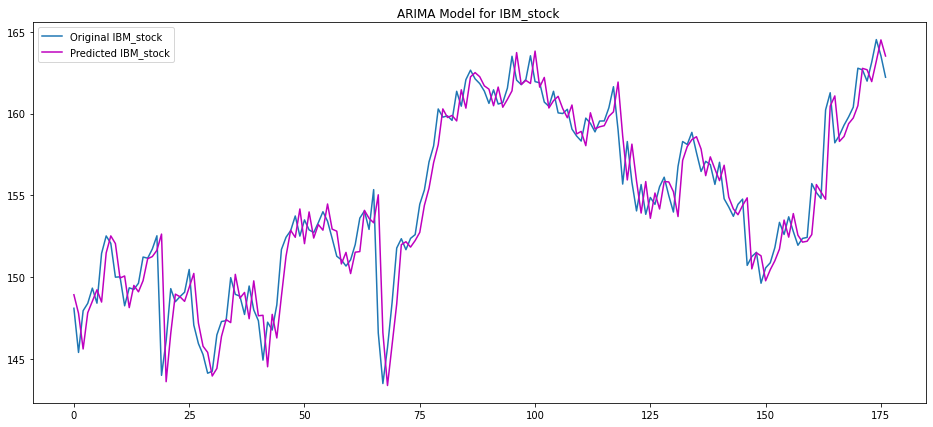

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

#dataset for ARIMA model
DF1 = ibm['Close'].dropna().to_numpy()
n = int(len(DF1)*0.7)
train1, test1 = DF1[:n], DF1[n:]
# fiting ARIMA model
ARIMA_model = ARIMA(DF1, order=(1, 1, 1))
ARIMA_model_fit = ARIMA_model.fit()
#prediction
ŷ1  = ARIMA_model_fit.predict(len(train1), len(train1)+len(test1)-1)
RMSE_ARIMA_Model = sqrt(mean_squared_error(test1, ŷ1 ))
print('Root Mean Square Error (RMSE) with ARIMA is :')
print(RMSE_ARIMA_Model)
plt.figure(figsize=(16,7))
plt.plot(test1,label='Original IBM_stock')
plt.plot(ŷ1 ,label='Predicted IBM_stock', color='M')
plt.title('ARIMA Model for IBM_stock ')
plt.legend()
plt.show()

# **2) Exponential Smoothing**

Root Mean Square Error (RMSE) with Exponential Smoothing is :
2.2503866549923073
__________________________________________


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


Text(0.5, 1.0, 'Exponential Smoothing Model for IBM_stock')

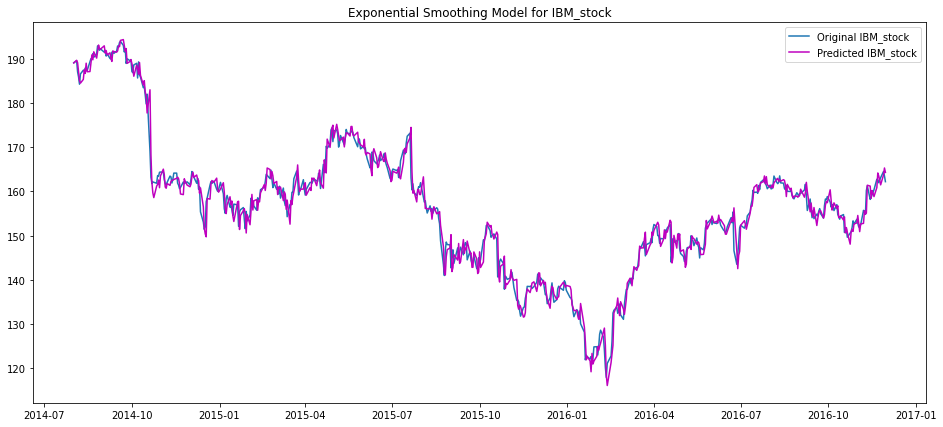

In [ ]:

from statsmodels.tsa.holtwinters import ExponentialSmoothing

data_ES = ibm['Close'].to_numpy()
date_ES = (ibm.index)

#Exponentital Smoothening Model
Exp_model = ExponentialSmoothing(ibm.Close,trend='mul',seasonal='mul',seasonal_periods=4)
ibm['Exp_Smoothening'] = Exp_model.fit(smoothing_level = 0.9,smoothing_slope= 0.1,smoothing_seasonal = 0.2).fittedvalues.shift(0)

RMSE_ExponentialSmoothing_Model = np.sqrt(np.mean(np.power((np.array(data_ES)-np.array(ibm.Exp_Smoothening)),2)))
print('Root Mean Square Error (RMSE) with Exponential Smoothing is :')
print(RMSE_ExponentialSmoothing_Model)
print("__________________________________________")

#Visulaize Data and Prediction
plt.figure(figsize=(16,7))
plt.plot(date_ES,data_ES, label='Original IBM_stock ')
plt.plot(date_ES,ibm.Exp_Smoothening, label='Predicted IBM_stock', color='M')
plt.legend()
plt.title('Exponential Smoothing Model for IBM_stock')

# **Machine Learning Model**

# **3) Vanila LSTM (LSTM Model 1)**

In [ ]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from math import sqrt
from sklearn.metrics import mean_squared_error

In [ ]:
# spliting univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		end_ix = i + n_steps
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [ ]:
raw_seq = ibm['Close']
#print(raw_seq)
trainLen = 470
train = raw_seq[:trainLen]
print(train)
test = raw_seq[trainLen:]

Date
2014-08-01    189.149994
2014-08-04    189.639999
2014-08-05    187.100006
2014-08-06    185.970001
2014-08-07    184.300003
                 ...    
2016-06-07    153.330002
2016-06-08    154.000000
2016-06-09    153.419998
2016-06-10    152.369995
2016-06-13    151.279999
Name: Close, Length: 470, dtype: float64


In [ ]:

Number_of_time_steps = 3

# spliting into samples
X, y = split_sequence(train, Number_of_time_steps)

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

# Creating LSTM Model 1
LSTM_Model_1 = Sequential()
LSTM_Model_1.add(LSTM(60, activation='relu', input_shape=(Number_of_time_steps, n_features)))
LSTM_Model_1.add(Dense(1))
LSTM_Model_1.compile(optimizer='adam', loss='mse')

# fiting LSTM Model 1
history = LSTM_Model_1.fit(X, y, epochs=160, verbose=0)

dict_keys(['loss'])


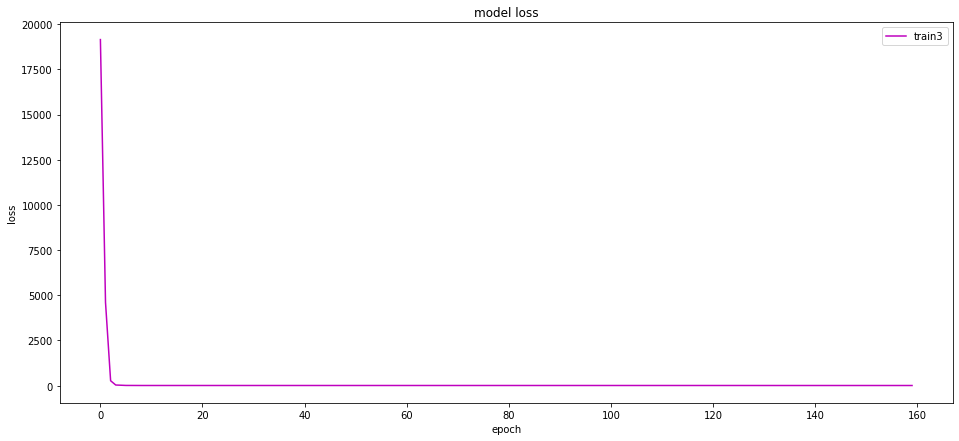

In [ ]:
print(history.history.keys())
# summarising history for loss
plt.figure(figsize=(16,7))
plt.plot(history.history['loss'], color='M')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train3', 'test'], loc='upper right')
plt.show()

In [ ]:
test = test.reset_index(drop = True)
# prediction
X_test3, y_test3 = split_sequence(test, Number_of_time_steps)
X_test3 = np.array(X_test3).reshape((-1, Number_of_time_steps, n_features))
ŷ3 = LSTM_Model_1.predict(X_test3, verbose=0)

RMSE_LSTM_Model_1 = sqrt(mean_squared_error(y_test3, ŷ3))
print('Root Mean Square Error (RMSE) with LSTM Model 1 is :')
print( RMSE_LSTM_Model_1)

Root Mean Square Error (RMSE) with LSTM Model 1 is :
2.0571194510217548


Root Mean Square Error (RMSE) with Vanila LSTM is :
2.0571194510217548
__________________________________________


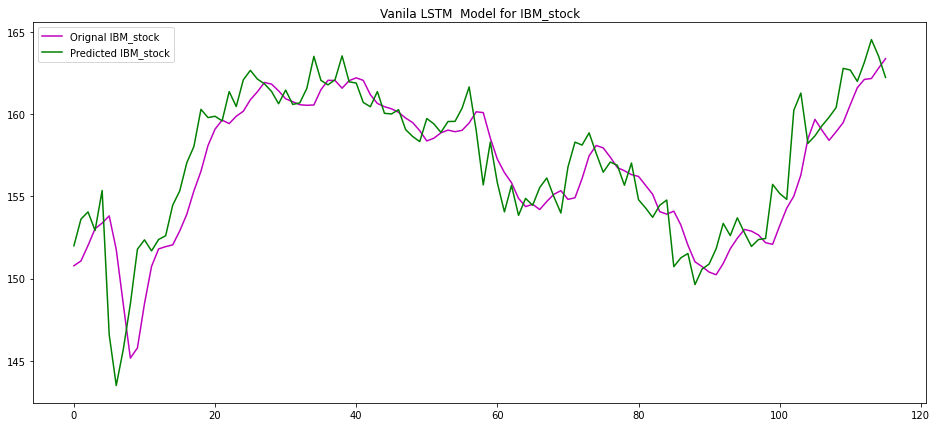

In [ ]:

plt.figure(figsize=(16,7))
plt.plot(ŷ3, label='Orignal IBM_stock' ,color='M')
plt.plot(y_test3,label ='Predicted IBM_stock', color='G')
plt.legend()
plt.title('Vanila LSTM  Model for IBM_stock')
print('Root Mean Square Error (RMSE) with Vanila LSTM is :')
print(RMSE_LSTM_Model_1)
print("__________________________________________")


# **4) Bidirectional LSTM (LSTM Model 2)**

In [ ]:
from keras.layers import Bidirectional
#Creating LSTM Model 2 
LSTM_Model_2 = Sequential()
LSTM_Model_2.add(Bidirectional(LSTM(60, activation='relu'), input_shape=(Number_of_time_steps, n_features)))
LSTM_Model_2.add(Dense(1))
LSTM_Model_2.compile(optimizer='adam', loss='mse')

# fit LSTM Model 2
history2 = LSTM_Model_2.fit(X, y, epochs=160, verbose=0)



dict_keys(['loss'])


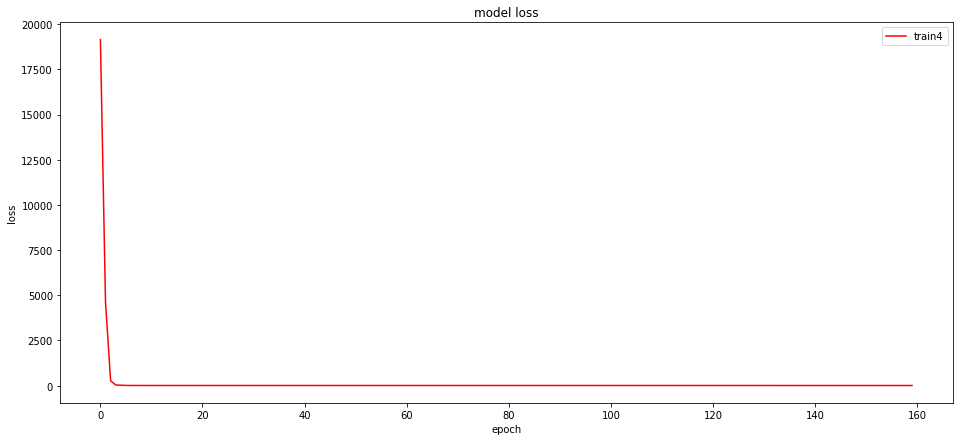

In [ ]:
print(history2.history.keys())
# summarize history for loss
plt.figure(figsize=(16,7))
plt.plot(history.history['loss'], color='r')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train4', 'test'], loc='upper right')
plt.show()

In [ ]:
# prediction
X_test4, y_test4 = split_sequence(test, Number_of_time_steps)
X_test4 = np.array(X_test4).reshape((-1, Number_of_time_steps, n_features))
ŷ4 = LSTM_Model_2.predict(X_test4, verbose=0)

RMSE_LSTM_Model_2 = sqrt(mean_squared_error(y_test4, ŷ4))
print(RMSE_LSTM_Model_2)

1.7688477448008468


Root Mean Square Error (RMSE) with Bidirectional LSTM is :
1.7688477448008468
__________________________________________


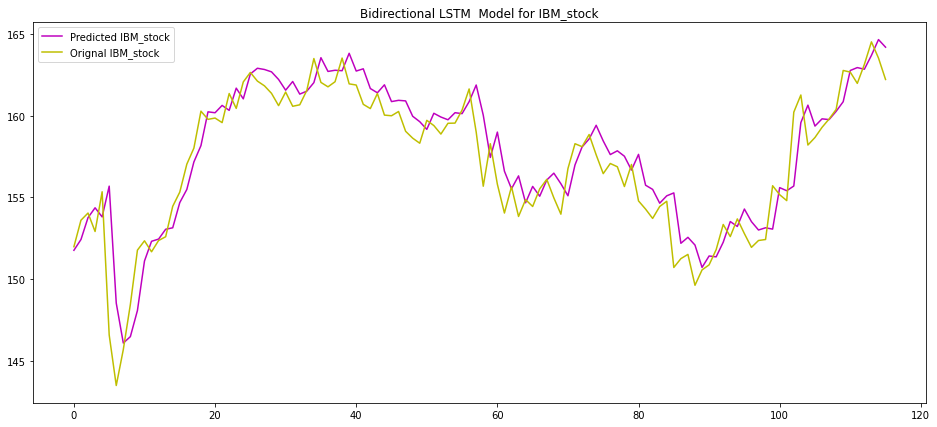

In [ ]:
plt.figure(figsize=(16,7))
plt.plot(ŷ4, label='Predicted IBM_stock' ,color='M')
plt.plot(y_test4,label ='Orignal IBM_stock', color='y')
plt.legend()
plt.title('Bidirectional LSTM  Model for IBM_stock')
print('Root Mean Square Error (RMSE) with Bidirectional LSTM is :')
print(RMSE_LSTM_Model_2)
print("__________________________________________")

# **Comparison  among  Four different models**

In [ ]:
print('Root Mean Square Error (RMSE) with ARIMA is :')
print(RMSE_ARIMA_Model)
print("__________________________________________")
print('Root Mean Square Error (RMSE) with ExponentialSmoothing is :')
print(RMSE_ExponentialSmoothing_Model)
print("__________________________________________")
print('Root Mean Square Error (RMSE) with Vanila LSTM  is :')
print( RMSE_LSTM_Model_1)
print("__________________________________________")
print('Root Mean Square Error (RMSE) with Bidirectional LSTM is :')
print(RMSE_LSTM_Model_2)

Root Mean Square Error (RMSE) with ARIMA is :
1.7273426676234453
__________________________________________
Root Mean Square Error (RMSE) with ExponentialSmoothing is :
2.2503866549923073
__________________________________________
Root Mean Square Error (RMSE) with Vanila LSTM  is :
2.0571194510217548
__________________________________________
Root Mean Square Error (RMSE) with Bidirectional LSTM is :
1.7688477448008468


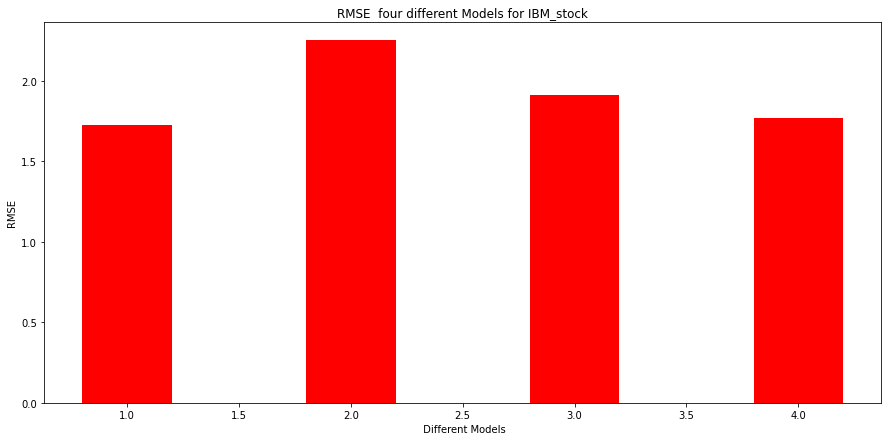

In [ ]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
# creating the dataset 
data = [1.7273426676234453, 2.2503866549923073,1.909833910881964,1.7688477448008468]
fig = plt.figure(figsize = (15, 7))
# 1=ARIMA Model,2=ExponentialSmoothing Model,3=Vanila LSTM Model,4=Bidirectional LSTM Model
plt.bar([1,2,3, 4], data, color ='red',  
        width = 0.4)
plt.ylabel("RMSE") 
plt.xlabel(" Different Models") 
plt.title("RMSE  four different Models for IBM_stock") 
plt.show()

In [ ]:
number =    [1.7273426676234453, 2.2503866549923073,1.909833910881964,1.7688477448008468]
smallest_number = min(number);

print("The smallest  RMSE is:", smallest_number)

The smallest  RMSE is: 1.7273426676234453


# **Conclusion** 

**After calculating RMSE value for different modelARIMA(1,1,1), ExponentialSmoothing,Vanila LSTM and Bidirectional LSTM)ARIMA(1,1,1) gives lowest RMSE value , So it is an appropriate model for the stock prediction For IBM Stock dataset.**